Versions: 
*  *Python*: 3.7.10
*  *Pandas*: 1.1.
*  *NumPy*:  1.19.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 0.22.2.post1

In [1]:
#Some usefull libreries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns

warnings.simplefilter(action='ignore')
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (7, 5)

def acumularVector(varianzaCP):
    for i, _ in enumerate(varianzaCP):
        if i>0:
            varianzaCP[i] += varianzaCP[i-1]
    return varianzaCP

In [4]:
#set wine
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()

labels = wine.target
classes = wine.target_names

wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Tipos de datos: 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object
Shape = (178, 13)
Targets: (178,)

Datos transformados: shape: (178, 13)
CP para X: (178, 13)


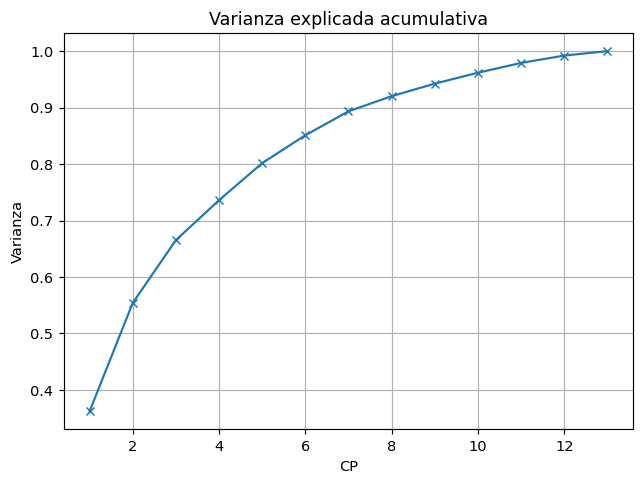

In [5]:
#PCA para revisar varianza explicada de los componentes
from sklearn.preprocessing import StandardScaler

X = wine.data
y = wine.target
print(f"Tipos de datos: {pd.DataFrame(X).dtypes}\nShape = {X.shape}")
print(f"Targets: {y.shape}")
sc = StandardScaler()
X_trans = sc.fit_transform(X)
print(f"\nDatos transformados: shape: {X_trans.shape}")

pca = PCA()
PC_X = pca.fit_transform(X_trans)
print(f"CP para X: {PC_X.shape}")

varianzaCP = pca.explained_variance_ratio_
varianzaCP = acumularVector(varianzaCP)

        
fig, ax = plt.subplots()
ax.set(title="Varianza explicada acumulativa", xlabel="CP", ylabel="Varianza")
ax.plot(range(1,X.shape[1]+1), varianzaCP, marker="x")
ax.grid()
fig.show()

In [6]:
#Grafico de grupos tomando 2 componentes principales:

pca = PCA(n_components=2)
X_transformado = pca.fit_transform(X_trans)
print(f"Matriz reducida a 2 PC: {X_transformado.shape}")

Matriz reducida a 2 PC: (178, 2)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

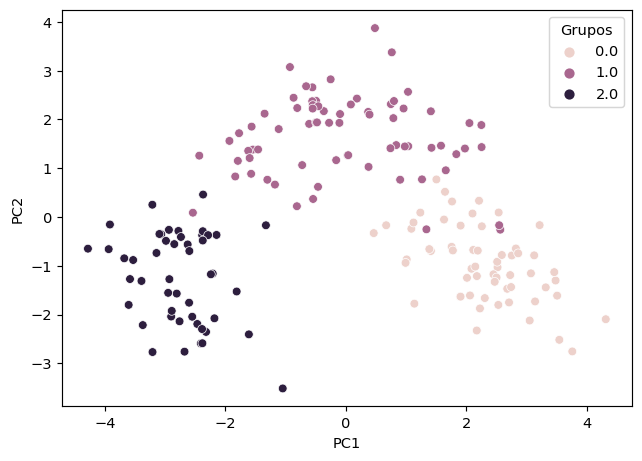

In [7]:
#Grafica de dispersion para PC 1 y 2
sns.scatterplot(data=pd.DataFrame(np.concatenate((X_transformado, y.reshape(-1,1)), axis=1), columns=["PC1","PC2", "Grupos"]), x="PC1", y="PC2", hue="Grupos")

In [8]:
#Obtencion de 3 PC
pca = PCA(n_components=3)
X_transformado = pca.fit_transform(X_trans)
print(f"Matriz reducida a 2 PC: {X_transformado.shape}")

Matriz reducida a 2 PC: (178, 3)


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

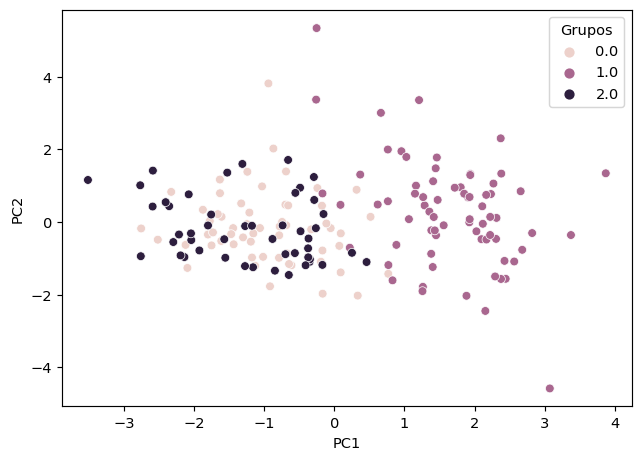

In [9]:
sns.scatterplot(data=pd.DataFrame(np.concatenate((X_transformado[:,1:], y.reshape(-1,1)), axis=1), columns=["PC1","PC2", "Grupos"]), x="PC1", y="PC2", hue="Grupos")

In [10]:
#PCA para set MNIST

#Conjuntos de datos - Repositorio OpenML
from sklearn.datasets import fetch_openml

# Descargamos el dataset desde OpenML. Este proceso puede tardar un poco.
mnist = fetch_openml('mnist_784', as_frame = False)

In [11]:
x_mnist = mnist.data[:1500,:]
y_mnist = mnist.target[:1500]
print(f"Data: {x_mnist.shape}")
print(f"Targets: {y_mnist.shape}\n")
ax_df = pd.DataFrame(x_mnist, columns=mnist.feature_names)
print(f"DataTypes from DF: {ax_df.dtypes.unique()}")
print(f"\nMissed data:\n{pd.isnull(ax_df).sum(axis=0)}\nGeneral by features: {pd.isnull(ax_df).sum(axis=0).sum()}")

Data: (1500, 784)
Targets: (1500,)

DataTypes from DF: [dtype('float64')]

Missed data:
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64
General by features: 0


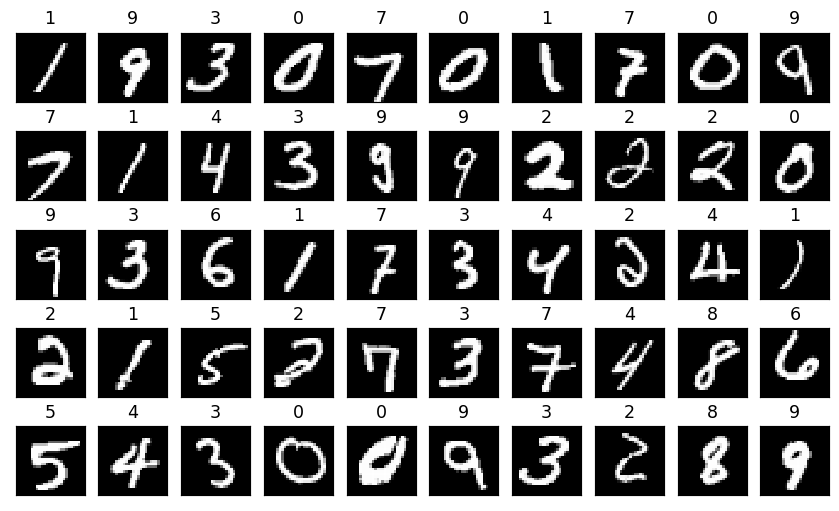

In [12]:
#Visualizacion de algunos ejemplos (aleatoriamente)

indices = np.random.permutation(x_mnist.shape[0])[0:50]

random_imgs   = x_mnist[indices]
random_labels = y_mnist[indices] 

fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(str(random_labels[i]))
    plt.xticks([]); plt.yticks([])

(784, 784)
(1500, 784)


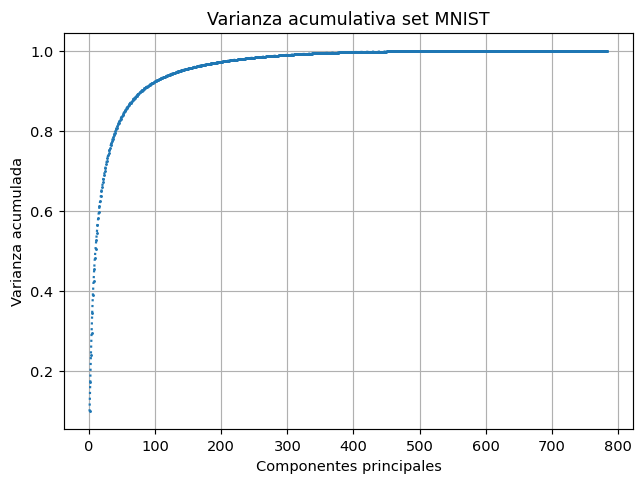

In [21]:
#Visualizacion de varianza explicada para los PC

pca = PCA()
pca.fit_transform(x_mnist)
print(pca.components_.shape)
print(x_mnist.shape)
varianza = pca.explained_variance_ratio_
varianza = acumularVector(varianza)
fig, ax = plt.subplots()
ax.set(title="Varianza acumulativa set MNIST", xlabel="Componentes principales", ylabel="Varianza acumulada")
ax.plot(range(1,x_mnist.shape[1]+1), varianza, linestyle="dotted", marker="o", markersize=1)

ax.grid()
fig.show()

In [14]:
import random
def show_images_pair(x, x_pca, n_img=5):
    '''
    Muestra imagenes de matrices:
    x: matriz inicial de ejemplos
    x_pca: matriz de ejemplos luego de aplicar PCA
    n_img: Numero de ejemplos a contrastar visualmente
    '''
    ind = random.sample(range(x.shape[0]), n_img)
    x_sample = x[ind,:]
    x_pca_sample = x_pca[ind,:]
    fig = plt.figure(figsize=(10,6))
    for pos in range(n_img):
        ax1 = fig.add_subplot(2, n_img, pos+1)
        plt.imshow(x_pca_sample[pos].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
        plt.xticks([]); plt.yticks([])
        ax2 = fig.add_subplot(2, n_img, n_img+(pos+1))
        plt.imshow(x_sample[pos].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
        plt.xticks([]); plt.yticks([])

Varianza acumulada con 10 CPA: 0.506


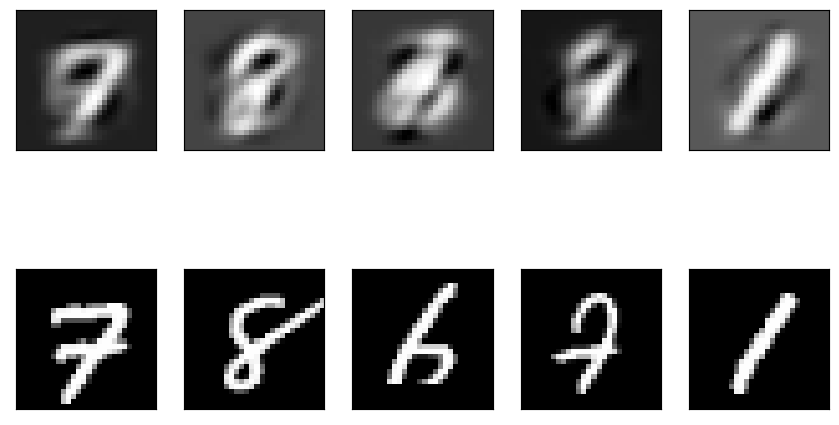

In [15]:
#Visualizacion con 10 CPA
n_cp = 10
pc = PCA(n_components=n_cp)
x_mnist_pca = pc.fit_transform(x_mnist)
print(f"Varianza acumulada con {n_cp} CPA: {np.sum(pc.explained_variance_ratio_[:n_cp]):.3f}")
x_mnist_pca = pc.inverse_transform(x_mnist_pca)
show_images_pair(x_mnist, x_mnist_pca)


Varianza acumulada con 100 CPA: 0.924


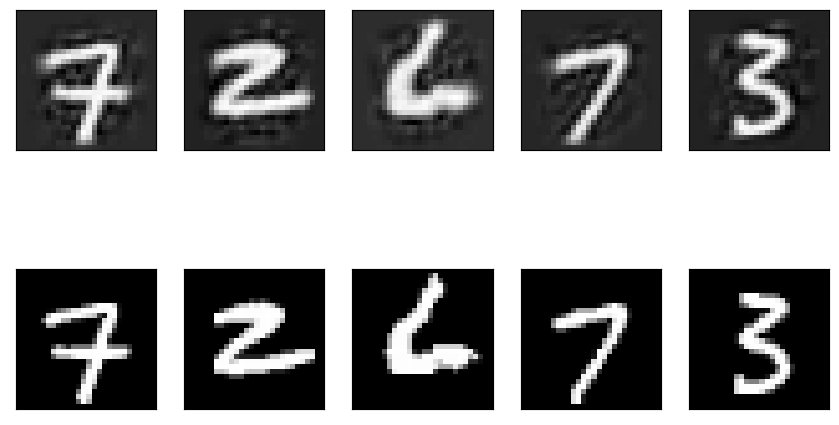

In [16]:
#visualizacion con 100 CP
n_cp = 100
pc = PCA(n_components=n_cp)
x_mnist_pca = pc.fit_transform(x_mnist)
print(f"Varianza acumulada con {n_cp} CPA: {np.sum(pc.explained_variance_ratio_[:n_cp]):.3f}")
x_mnist_pca = pc.inverse_transform(x_mnist_pca)
show_images_pair(x_mnist, x_mnist_pca)


In [17]:
# Selección de modelos y validación cruzada.
from sklearn.model_selection import cross_val_score

# Métodos de modelado - Clasificación con NaiveBayes Gaussiano.
from sklearn.naive_bayes import GaussianNB

print(f"Accuracy con datos originales: {np.mean(cross_val_score(GaussianNB(), x_mnist, y_mnist, cv=5)):.4f}")
print(f"Accuracy con la nueva representación: {np.mean(cross_val_score(GaussianNB(), x_mnist_pca, y_mnist, cv=5)):.4f}")

Accuracy con datos originales: 0.5680
Accuracy con la nueva representación: 0.7900
